### Data Preprocessing

In [103]:
import pandas as pd
import numpy as np

In [104]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_labs = pd.read_csv('https://api.vitaldb.net/labs')

* df_trks chech

In [105]:
df_trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


* If df_trks['tname'] == 'SNUADC/PLETH'

In [106]:
df_trks['tname'].unique() 

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [107]:
df_trks_id = set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid'])

In [108]:
len(df_trks_id)

6157

In [109]:
len(set(df_trks_id))

6157

In [197]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [199]:
len(df_cases.columns)

74

* Only SNUADC/PLETH id

In [111]:
df_ica = df_cases[df_cases['caseid'].map(lambda x: x in df_trks_id)]

In [112]:
df_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* ica : label(up, norm, down)

In [113]:
lab_ica_id = list(set(df_labs[df_labs['name'] == 'ica']['caseid']))

In [114]:
df_labs_ica = df_ica[df_ica['caseid'].map(lambda x: x in lab_ica_id)]

In [115]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [116]:
def anocut(x):
  if 1.1 <= x <= 1.3:
    output = 'Norm'
  elif x > 1.3:
    output = 'UpNorm'
  else:
    output = 'DnNorm'
  return output

In [117]:
df_labs['label'] = df_labs[df_labs['name'] == 'ica']['result'].map(lambda x : anocut(x))

In [118]:
df_labs = df_labs.dropna()

In [119]:
df_labs

,caseid,dt,name,result,label
55,1,3060,ica,1.03,DnNorm
56,1,8921,ica,1.04,DnNorm
57,1,4628,ica,1.08,DnNorm
346,4,28903,ica,1.13,Norm
347,4,19934,ica,1.15,Norm
...,...,...,...,...,...
928275,6386,3549,ica,1.18,Norm
928276,6386,12554,ica,1.18,Norm
928359,6387,1905,ica,1.10,Norm
928422,6388,6649,ica,1.03,DnNorm


* drop_duplicates

In [120]:
df_ica_label = df_labs.drop_duplicates(['caseid'],  keep='last', inplace=False, ignore_index=False)

In [121]:
id_lb = df_ica_label[['caseid', 'label']]

In [122]:
id_lb

,caseid,label
57,1,DnNorm
351,4,Norm
708,5,Norm
1075,7,Norm
1435,10,Norm
...,...,...
927826,6383,DnNorm
928156,6385,DnNorm
928276,6386,Norm
928359,6387,Norm


In [123]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* merge : case, labs

In [124]:
final_df = pd.merge(df_labs_ica, id_lb, on='caseid')

In [125]:
final_df 

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,DnNorm
1,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,80,0.0,100,100,0,50,0,0,0,Norm
2,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0.0,0,160,0,10,900,0,2100,Norm
3,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0.0,0,120,0,0,0,0,0,Norm
4,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,90,0.0,0,110,0,20,500,0,600,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,0,0.0,0,80,0,10,0,0,300,DnNorm
3532,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,100,0.0,0,100,0,25,30,0,300,DnNorm
3533,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,70,0.0,0,130,0,10,0,0,0,Norm
3534,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,120,0.0,0,50,0,0,0,0,0,Norm


* drop NAN

In [126]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3535
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               3536 non-null   int64  
 1   subjectid            3536 non-null   int64  
 2   casestart            3536 non-null   int64  
 3   caseend              3536 non-null   int64  
 4   anestart             3536 non-null   int64  
 5   aneend               3536 non-null   float64
 6   opstart              3536 non-null   int64  
 7   opend                3536 non-null   int64  
 8   adm                  3536 non-null   int64  
 9   dis                  3536 non-null   int64  
 10  icu_days             3536 non-null   int64  
 11  death_inhosp         3536 non-null   int64  
 12  age                  3536 non-null   float64
 13  sex                  3536 non-null   object 
 14  height               3536 non-null   float64
 15  weight               3536 non-null   f

In [127]:
final_df = final_df.dropna(axis=1)

In [128]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3535
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   caseid           3536 non-null   int64  
 1   subjectid        3536 non-null   int64  
 2   casestart        3536 non-null   int64  
 3   caseend          3536 non-null   int64  
 4   anestart         3536 non-null   int64  
 5   aneend           3536 non-null   float64
 6   opstart          3536 non-null   int64  
 7   opend            3536 non-null   int64  
 8   adm              3536 non-null   int64  
 9   dis              3536 non-null   int64  
 10  icu_days         3536 non-null   int64  
 11  death_inhosp     3536 non-null   int64  
 12  age              3536 non-null   float64
 13  sex              3536 non-null   object 
 14  height           3536 non-null   float64
 15  weight           3536 non-null   float64
 16  bmi              3536 non-null   float64
 17  emop          

In [129]:
final_df['label'].value_counts()

Norm      3025
DnNorm     342
UpNorm     169
Name: label, dtype: int64

* data balance

In [130]:
df_dn = final_df[final_df['label'] == 'DnNorm'][:169]

In [131]:
df_norm = final_df[final_df['label'] == 'Norm'][:169]

In [132]:
df_up = final_df[final_df['label'] == 'UpNorm'][:169]

In [133]:
df_bal = pd.concat([df_dn, df_norm, df_up], axis=0)

In [134]:
df_bal

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,DnNorm
12,25,1669,0,14832,-1118,14782.0,1882,13882,-221280,901920,...,100,0.0,0,100,0,20,90,0,600,DnNorm
18,38,2216,0,12291,-651,12009.0,3489,11690,-221640,296760,...,0,0.0,0,110,0,10,0,0,0,DnNorm
27,52,1724,0,15590,-1453,15647.0,3647,14747,-220140,1075860,...,0,0.0,0,120,0,0,0,0,0,DnNorm
37,69,3443,0,7364,-672,6768.0,1668,5868,-124620,307380,...,0,0.0,0,80,0,0,0,0,0,DnNorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,6337,5565,0,24223,-449,25651.0,4051,23551,-1286520,1391880,...,0,0.0,0,3,0,0,0,0,0,UpNorm
3513,6351,3577,0,30861,-952,30848.0,3548,29648,-373800,1008600,...,0,0.0,0,120,0,30,400,0,1800,UpNorm
3517,6359,3107,0,7884,-553,7367.0,1367,6467,-122220,50580,...,0,0.0,0,50,0,0,0,0,0,UpNorm
3529,6378,3181,0,25049,-368,25432.0,4612,24232,-399360,551040,...,100,0.0,0,110,0,30,0,0,600,UpNorm


* train_x

In [135]:
f_train_x = df_bal.drop(['caseid','label'], axis=1)

* object : one-hot encoding

In [136]:
df_tp = f_train_x.dtypes.reset_index()

In [137]:
df_tp

,index,0
0,subjectid,int64
1,casestart,int64
2,caseend,int64
3,anestart,int64
4,aneend,float64
5,opstart,int64
6,opend,int64
7,adm,int64
8,dis,int64
9,icu_days,int64


In [138]:
ob_lt = list(df_tp[(df_tp[0] == 'object')]['index'])

In [139]:
ob_lt

['sex',
 'department',
 'optype',
 'dx',
 'opname',
 'approach',
 'ane_type',
 'preop_ecg',
 'preop_pft']

In [140]:
uniq = dict()
for i in ob_lt:
    uniq[i] = len(f_train_x[i].unique())

In [141]:
uniq

{'sex': 2,
 'department': 4,
 'optype': 11,
 'dx': 217,
 'opname': 105,
 'approach': 3,
 'ane_type': 3,
 'preop_ecg': 9,
 'preop_pft': 9}

In [142]:
f_train_x = f_train_x.drop(['dx', 'preop_ecg','opname'], axis=1)

In [143]:
ob_lt = ['sex',
    'department',
    'optype',
#    'dx',
#    'opname',
    'approach',
    'ane_type',
#    'preop_ecg',
    'preop_pft']

In [144]:
df_oh = pd.get_dummies(f_train_x[ob_lt])

In [145]:
df_no_oh = f_train_x.drop(ob_lt, axis=1)

In [146]:
final_train_x = pd.concat([df_oh, df_no_oh], axis=1)

In [147]:
final_train_x

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,0,1,1,0,0,0,0,0,1,0,...,0,120,0.0,100,70,0,10,0,0,0
12,0,1,1,0,0,0,0,0,0,0,...,0,100,0.0,0,100,0,20,90,0,600
18,0,1,0,0,1,0,0,0,0,0,...,0,0,0.0,0,110,0,10,0,0,0
27,0,1,1,0,0,0,0,0,0,0,...,35,0,0.0,0,120,0,0,0,0,0
37,0,1,0,0,1,0,0,0,0,0,...,0,0,0.0,0,80,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,1,0,1,0,0,0,0,0,0,0,...,20,0,0.0,0,3,0,0,0,0,0
3513,0,1,1,0,0,0,0,0,0,0,...,500,0,0.0,0,120,0,30,400,0,1800
3517,1,0,1,0,0,0,0,0,0,0,...,0,0,0.0,0,50,0,0,0,0,0
3529,1,0,1,0,0,0,0,0,0,1,...,500,100,0.0,0,110,0,30,0,0,600


* remove : correlation

In [148]:
train_corr = final_train_x.corr() ;train_corr

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
sex_F,1.000000,-1.000000,-0.108418,0.271310,0.007773,-0.127584,-0.035689,0.142920,-0.048117,-0.114120,...,0.102809,-0.033730,0.026994,0.111508,-0.190709,NaN,0.019145,0.028420,-0.041816,-0.067088
sex_M,-1.000000,1.000000,0.108418,-0.271310,-0.007773,0.127584,0.035689,-0.142920,0.048117,0.114120,...,-0.102809,0.033730,-0.026994,-0.111508,0.190709,NaN,-0.019145,-0.028420,0.041816,0.067088
department_General surgery,-0.108418,0.108418,1.000000,-0.425774,-0.775096,-0.270651,0.189333,0.080576,0.227817,0.155570,...,0.017916,0.035297,-0.047275,0.046099,-0.079014,NaN,0.130130,-0.024389,0.026651,0.102013
department_Gynecology,0.271310,-0.271310,-0.425774,1.000000,-0.118558,-0.041399,-0.080613,-0.034307,-0.096999,-0.066238,...,0.057513,0.288446,-0.018509,0.144121,-0.139977,NaN,-0.038189,-0.065305,-0.011520,-0.059334
department_Thoracic surgery,0.007773,-0.007773,-0.775096,-0.118558,1.000000,-0.075364,-0.146751,-0.062454,-0.176580,-0.120582,...,-0.052074,-0.313220,0.071029,-0.130928,0.233362,NaN,-0.120250,0.087150,-0.020503,-0.066655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intraop_vecu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intraop_eph,0.019145,-0.019145,0.130130,-0.038189,-0.120250,-0.014451,0.078257,0.001240,-0.012970,0.083297,...,0.123064,0.150245,-0.037763,0.033580,0.128595,NaN,1.000000,0.069232,-0.022700,0.057899
intraop_phe,0.028420,-0.028420,-0.024389,-0.065305,0.087150,-0.043648,-0.038604,-0.035837,-0.048937,0.005336,...,0.337230,-0.068477,0.018972,-0.075617,0.262089,NaN,0.069232,1.000000,-0.010757,0.348777
intraop_epi,-0.041816,0.041816,0.026651,-0.011520,-0.020503,-0.007323,-0.014260,-0.006069,-0.017068,-0.011717,...,-0.012573,-0.034150,0.222446,-0.018477,0.024020,NaN,-0.022700,-0.010757,1.000000,0.249546


In [149]:
train_false = abs(train_corr) > 0.5 ; train_false

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
sex_F,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex_M,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
department_General surgery,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
department_Gynecology,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
department_Thoracic surgery,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intraop_vecu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
intraop_eph,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
intraop_phe,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
intraop_epi,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [150]:
co_index = []
for i in train_false.index:
    du = train_false[train_false[i] == True].index
    # if corr > 0.5
    du = list(du)
    du = list(du[1:])
    co_index.append(du)

In [151]:
re_co_index = []
for i in co_index:
    for j in i:
        re_co_index.append(j)

* high corr count

In [152]:
from collections import Counter

In [153]:
cnt = Counter(re_co_index)

In [154]:
cnt = dict(cnt) ; cnt

{'sex_M': 2,
 'department_Thoracic surgery': 2,
 'optype_Major resection': 2,
 'approach_Robotic': 2,
 'approach_Videoscopic': 2,
 'ane_type_Sedationalgesia': 2,
 'preop_pft_Normal': 2,
 'aneend': 4,
 'opstart': 3,
 'opend': 5,
 'intraop_rocu': 4,
 'icu_days': 2,
 'weight': 2,
 'bmi': 2,
 'intraop_ffp': 3,
 'intraop_ca': 3}

In [155]:
len(cnt)

16

In [156]:
index = [ k for k, v in cnt.items() if v >= 1] 

In [157]:
len(index)

16

In [158]:
final_train_x = final_train_x.drop(index, axis=1) ; final_train_x.head()

,sex_F,department_General surgery,department_Gynecology,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,optype_Minor resection,optype_Others,...,preop_dm,intraop_rbc,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_vecu,intraop_eph,intraop_phe,intraop_epi
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,120,0.0,100,0,10,0,0
12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,100,0.0,0,0,20,90,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,10,0,0
27,0,1,0,0,0,0,0,0,0,0,...,0,0,35,0,0.0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.0,0,0,0,0,0


* PCA

In [160]:
from sklearn.decomposition import PCA

pca = PCA(n_components=46)
pca_array = pca.fit_transform(final_train_x)
pca_df = pd.DataFrame(pca_array, index=final_train_x.index,
                      columns=[f"pca{num+1}" for num in range(final_train_x.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46
0,-360250.137273,-77085.718742,-1806.969844,-2797.469628,720.428879,-186.003048,-0.736169,-4.729466,100.749538,45.792435,...,-0.073011,-0.040990,0.029725,-0.009558,-0.022254,-0.000928,0.020133,-0.016275,-1.650908e-10,-1.466343e-10
12,-89049.824791,-119832.188056,1365.181436,1306.482934,-445.612255,385.199335,-34.655986,-75.164731,52.260756,-34.530797,...,-0.021058,-0.015617,-0.030200,-0.004148,-0.001586,-0.010460,-0.007524,0.009642,-1.830864e-10,-9.966127e-11
18,-691036.238990,-57926.559052,-933.931169,805.141796,-325.643279,-95.858524,-80.194667,-33.568749,-44.373758,2.094344,...,-0.175289,-0.034540,0.029275,-0.083577,0.037964,-0.085616,-0.000643,0.015075,3.473702e-11,6.253509e-11
27,83872.575388,-138656.768087,2051.535042,1244.828084,-421.471006,726.228491,-113.874016,-23.560378,-42.250269,4.415679,...,0.000849,0.001870,-0.018275,-0.001323,-0.000682,0.001220,-0.021860,-0.018809,-2.988196e-11,-2.826882e-11
37,-690339.784782,-155518.203193,-5965.034300,-379.867273,-2.149177,-66.838764,16.976424,-3.737251,-44.523104,-3.340523,...,-0.169462,0.004844,-0.008771,-0.023218,-0.018279,0.130417,0.004906,-0.022223,-1.063724e-10,-4.919167e-11


In [162]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(final_train_x.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,3.196354e+12,9.118575e-01,0.911858
pca2,3.089137e+11,8.812704e-02,0.999985
pca3,4.794034e+07,1.367644e-05,0.999998
pca4,2.922991e+06,8.338724e-07,0.999999
pca5,2.712697e+06,7.738795e-07,1.000000
pca6,4.721930e+05,1.347075e-07,1.000000
pca7,7.055262e+04,2.012729e-08,1.000000
pca8,2.681700e+04,7.650368e-09,1.000000
pca9,3.123001e+03,8.909314e-10,1.000000
pca10,8.162520e+02,2.328608e-10,1.000000


In [163]:
re_pca =[]
for i in pca_array:
    pca_num = i[:4]
    re_pca.append(pca_num)

In [167]:
train_y = df_bal['label']

In [168]:
train_x = re_pca

In [169]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,
                                                   test_size=0.2, random_state=42, stratify=train_y)

* Modeling

* Decision Tree

In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

In [171]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [172]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [173]:
dt_preds = dt_clf.predict(X_test)

In [174]:
accuracy_score(y_test, dt_preds)

0.46078431372549017

In [177]:
f1_score(y_test, dt_preds, average='weighted')

0.46280775609133823

* tuning

In [178]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [5, 10, 15],
    'max_leaf_nodes': [2, 3, 4],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=cv)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
nan


In [179]:
dt_preds = grid_cv.predict(X_test)

In [180]:
accuracy_score(y_test, dt_preds)

0.4215686274509804

* lightGBM

In [181]:
import lightgbm as lgb

In [182]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)

LGBMClassifier(objective='binary')

In [183]:
y_pred = lgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.49019607843137253

In [184]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

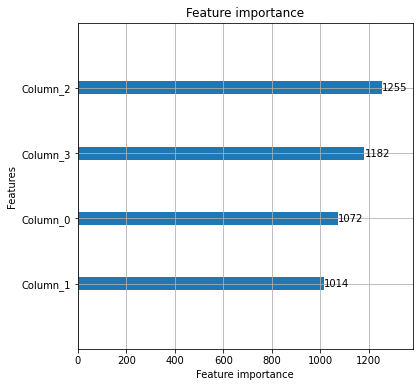

In [185]:
f, ax = plt.subplots(figsize=(6,6))
plot_importance(lgb_clf, max_num_features=15, ax=ax)

* KNN

In [186]:
neigh_clf = KNeighborsClassifier()

In [187]:
neigh_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [188]:
neigh_preds = neigh_clf.predict(X_test)

In [189]:
accuracy_score(y_test, neigh_preds)

0.4411764705882353

In [190]:
f1_score(y_test, neigh_preds, average='weighted')

0.43131313131313137

In [191]:
params = {
    'n_neighbors': [8, 10, 13, 15, 18, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 2, 3, 5, 10, 20],
    'p': [1, 2]
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(neigh_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
nan


In [192]:
neigh_preds = grid_cv.predict(X_test)

In [193]:
accuracy_score(y_test, neigh_preds)

0.47058823529411764

In [194]:
f1_score(y_test, neigh_preds, average='weighted')

0.4684413853143619